# ***Ashish Kumar Singh***

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [39]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Red_wine_.csv')

In [40]:
data.shape

(1599, 12)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


Finding the null values

In [42]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

Replacing the null values with mean

In [43]:
for col in data.columns:
  if data[col].isnull().sum()>0:
    data[col]=data[col].fillna(data[col].mean())
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [44]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [45]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.52,0.66,11.0,6.0


In [46]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.865961,0.001887,0.080321,0.169507,1.065668,0.807413
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [47]:
duplicate_value=data.duplicated()
duplicate_value.sum()

239

In [48]:
data[duplicate_value]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5.0
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5.0
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5.0
76,8.8,0.410,0.64,2.20,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.52,0.54,10.1,5.0
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.52,0.54,10.1,5.0
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.52,0.54,10.1,5.0
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.52,0.60,11.3,5.0


In [49]:
data.drop_duplicates(inplace=True)

In [50]:
data.shape

(1360, 12)

In [51]:
duplicate_value=data.duplicated()
duplicate_value.sum()

0

In [52]:
data.quality.value_counts()

5.000000    577
6.000000    535
7.000000    167
4.000000     53
8.000000     17
3.000000     10
5.636421      1
Name: quality, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


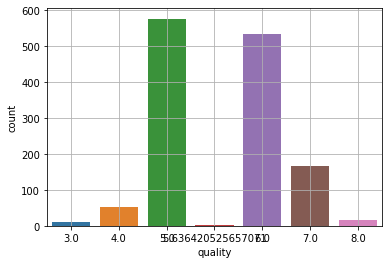

In [53]:
sb.countplot(data['quality'])
plt.grid()
plt.show()

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

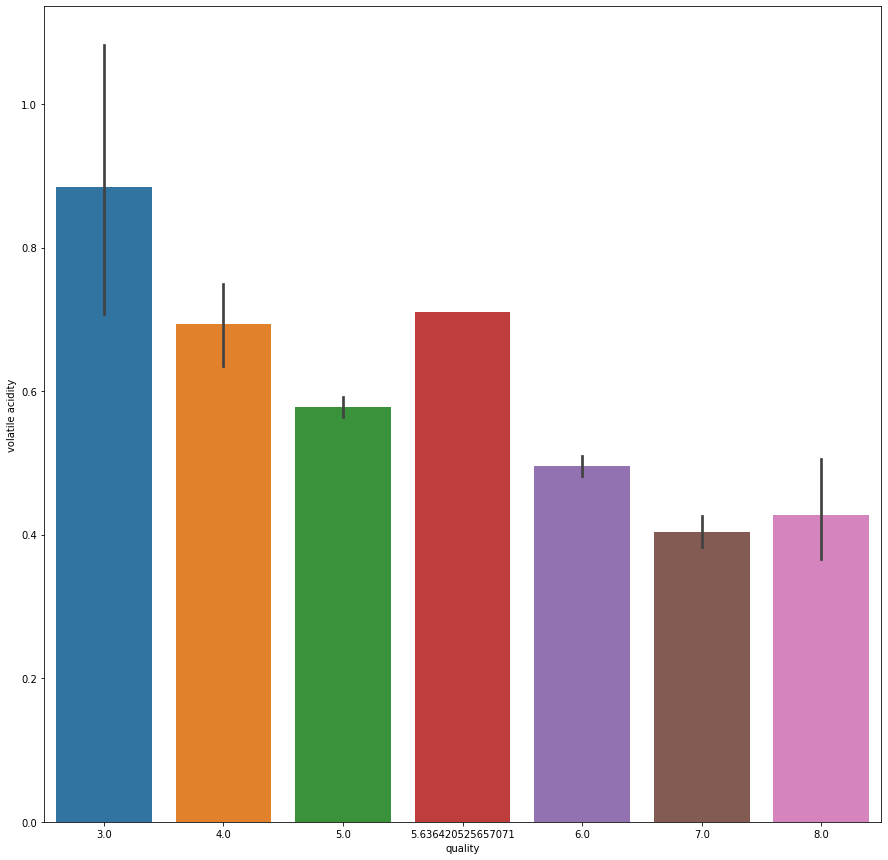

In [54]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(15,15))
sb.barplot(x='quality', y = 'volatile acidity',data=data)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

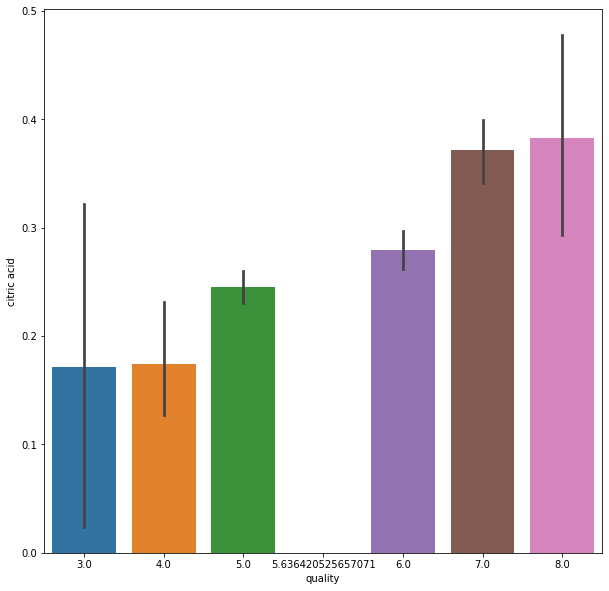

In [55]:
# citric acid vs Quality
plot = plt.figure(figsize=(10,10))
sb.barplot(x='quality', y = 'citric acid', data = data)

In [56]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255046,0.667181,0.109826,0.085995,-0.140605,-0.103764,0.669857,0.029456,0.189922,-0.061613,0.119172
volatile acidity,-0.255046,1.000000,-0.551255,-0.002755,0.055192,-0.020957,0.071702,0.023871,-0.044874,-0.256979,-0.197817,-0.394559
citric acid,0.667181,-0.551255,1.000000,0.144383,0.210055,-0.047966,0.047350,0.358083,-0.001183,0.326229,0.105121,0.226998
residual sugar,0.109826,-0.002755,0.144383,1.000000,0.025913,0.160321,0.200500,0.324783,0.041654,-0.010197,0.063240,0.012168
chlorides,0.085995,0.055192,0.210055,0.025913,1.000000,0.000722,0.045774,0.193410,-0.277775,0.394229,-0.223829,-0.130883
free sulfur dioxide,-0.140605,-0.020957,-0.047966,0.160321,0.000722,1.000000,0.667243,-0.018023,-0.038636,0.054177,-0.080119,-0.050788
total sulfur dioxide,-0.103764,0.071702,0.047350,0.200500,0.045774,0.667243,1.000000,0.078127,-0.163091,0.035275,-0.217829,-0.178067
density,0.669857,0.023871,0.358083,0.324783,0.193410,-0.018023,0.078127,1.000000,-0.044686,0.146336,-0.504904,-0.184283
pH,0.029456,-0.044874,-0.001183,0.041654,-0.277775,-0.038636,-0.163091,-0.044686,1.000000,-0.252900,0.238286,0.133383
sulphates,0.189922,-0.256979,0.326229,-0.010197,0.394229,0.054177,0.035275,0.146336,-0.252900,1.000000,0.091636,0.247882


<AxesSubplot:>

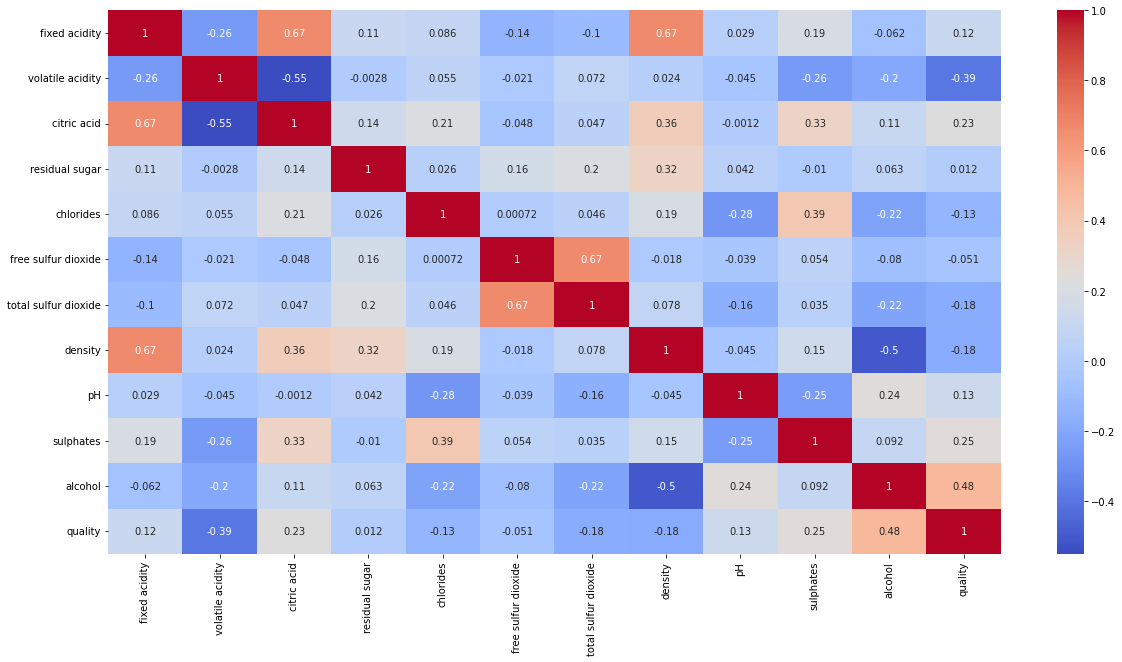

In [57]:
corr=data.corr()
plt.figure(figsize=(20,10))
sb.heatmap(corr,annot=True,cmap='coolwarm')

Text(0.5, 1.0, 'Quality vs Alchohol')

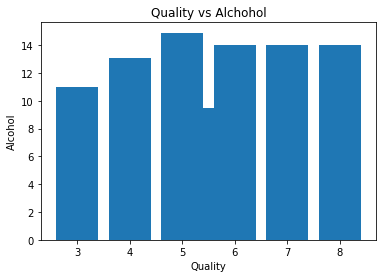

In [58]:
plt.bar(data['quality'],data['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Quality vs Alchohol')

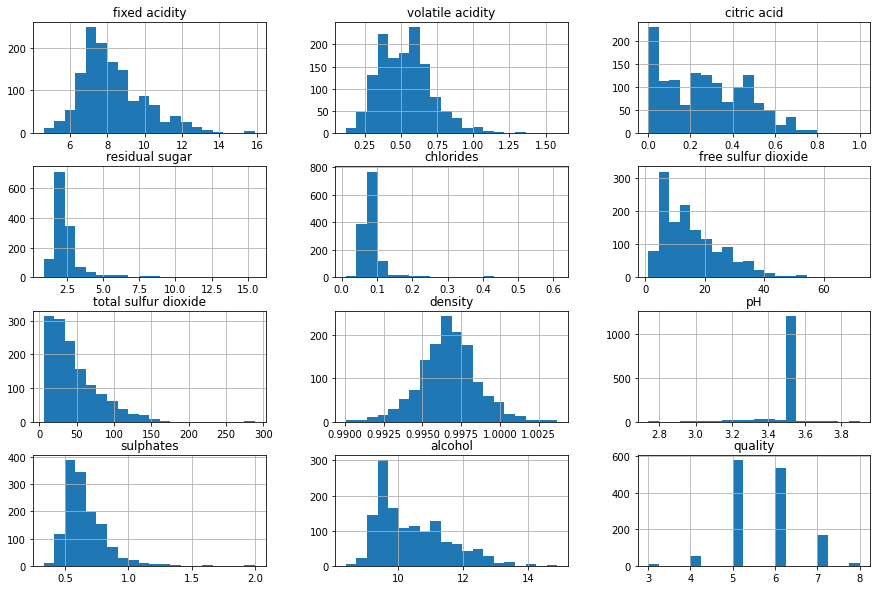

In [59]:
data.hist(bins=20,figsize=(15,10))
plt.show()

In [60]:
# separate the data and Label
x = data.drop('quality',axis=1)

In [61]:
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [62]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [63]:
x.shape

(1360, 11)

In [64]:
y = data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [65]:
y.head()

0    0
1    0
2    0
3    0
5    0
Name: quality, dtype: int64

In [66]:
y.shape

(1360,)

Feature Scaling

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [68]:
print(y.shape,y_train.shape,y_test.shape)

(1360,) (1088,) (272,)


Model Training

Random forest classifier

In [69]:
model=RandomForestClassifier()

In [70]:
model.fit(x_train,y_train)

RandomForestClassifier()

Model Evaluation


Accuracy Score

In [71]:
y_test

484     0
1518    0
443     1
469     0
94      0
       ..
679     0
991     0
474     0
657     1
547     0
Name: quality, Length: 272, dtype: int64

In [72]:
x_test_prediction=model.predict(x_test)


test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [73]:
print('Accuracy: ',test_data_accuracy)

Accuracy:  0.9007352941176471


In [74]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
